In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Functions as f
from matplotlib.colors import ListedColormap

In [44]:
data = pd.read_csv('data/microchips.csv').to_numpy()
np.random.shuffle(data)
X_train, y_train = data[:, :2], data[:, 2]
x1 = X_train[:, 0]
x2 = X_train[:, 1]

1.  Plot the data in X and y using different symbols or colors for the two different classes.
Notice also that X1 and X2 are already normalized. Hence, no need for normalization in
this exercise.


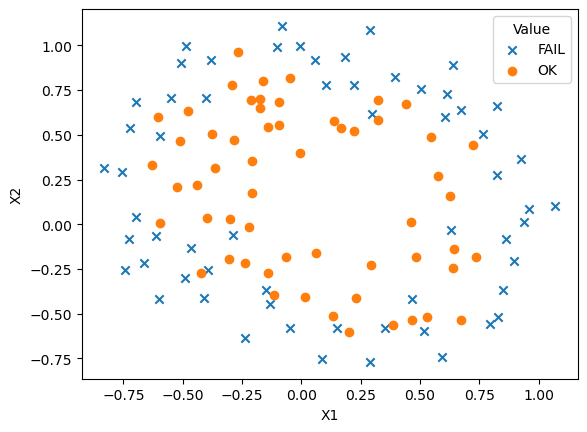

In [45]:
markers = {1: 'o', 0: 'x'}
for val in set(y_train):
    mask = y_train == val
    plt.scatter(x1[mask], x2[mask], marker=markers[val], label="OK" if val == 1 else "FAIL")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Value')

2. Use gradient descent to find beta in the case of a quadratic model.

In [46]:
Xe = f.mapFeature(x1, x2, 2)
J_values = []
N_iterations = 4000
alpha = 0.5
betas, costs = f.gradient_descent_logistic(Xe, y_train, alpha, N_iterations)
beta = betas[-1]
cost = costs[-1]
print(f'Final beta: {beta}, Final cost: {cost}, N iterations: {N_iterations}, alpha: {alpha}')

Final beta: [  4.55501483   2.76962841   3.59032192 -10.58290166  -6.39047898
 -10.34120502], Final cost: 0.3522270765267494, N iterations: 4000, alpha: 0.5


continued -> Produce the 1x2 plot with:
    1) the cost function J(beta) as a function over iterations
    2) the corresponding decision boundary(together with the X, y scatter plot)
    3) the number of training errors presented as a part of the decision boundary plot title.

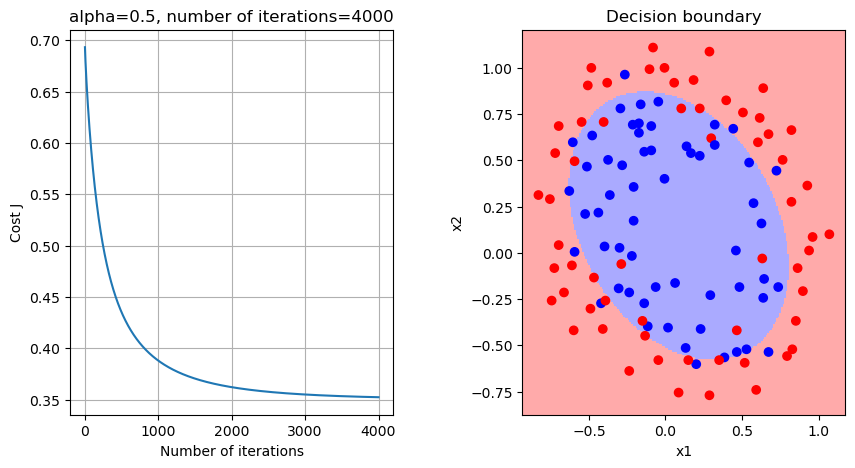

In [47]:
h = .01 # step size in the mesh
x_min, x_max = x1.min() -0.1, x1.max()+0.1
y_min, y_max = x2.min() -0.1, x2.max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x1_mesh, x2_mesh = xx.ravel(), yy.ravel()
Xe_mesh = f.mapFeature(x1_mesh, x2_mesh, 2)
Xe = f.mapFeature(x1, x2, 2)
p = f.sigmoid(np.dot(Xe_mesh, beta))
classes = p > 0.5
clz_mesh = classes.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(range(N_iterations + 1), costs)
axes[0].set_title(f"alpha={0.5}" f", number of iterations={N_iterations}")
axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel('Cost J')
axes[0].grid()

axes[1].set_title(f"Decision boundary")
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
axes[1].scatter(x1, x2, c=y_train, cmap=cmap_bold)

plt.subplots_adjust(wspace=0.4)